Setting up the functions to perform the training and data recording

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from time import time
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

mushrooms = pd.read_csv('mushroom_final.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,2,1,2,1,1,2,1,...,1,1,1,1,1,1,1,2,2,2
2,1,2,1,3,1,3,1,1,2,2,...,1,1,1,1,1,1,1,2,2,3
3,0,1,2,3,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,4,0,4,1,2,2,1,...,1,1,1,1,1,1,2,2,3,2


In [66]:
features = mushrooms.drop('class',axis=1)
labels = mushrooms['class']

#split features and labels into train (70%), test (15%), and validation (15%) sets
#f for features
#l for labels
def split_features(features,labels):
    f_train, f_test, l_train, l_test = train_test_split(features,labels, test_size=0.3,random_state=42)
    f_val, f_test, l_val, l_test = train_test_split(f_test,l_test, test_size=0.5,random_state=42)
    
    return f_train, f_test, f_val, l_train, l_test, l_val

In [72]:
def svm_trainer(features,labels,train_count):
    svc = SVC()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        svc.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

train_times = svm_trainer(features,labels,train_count=10)
print("done!")

round 0
done!


In [74]:
def knn_trainer(features,labels,train_count):
    knn = KNeighborsClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        knn.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

train_times = knn_trainer(features,labels,train_count=10)
print("done!")

round 0
done!


In [77]:
def logistic_regression_trainer(features,labels,train_count):
    lr = LogisticRegression()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        lr.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

train_times = logistic_regression_trainer(features,labels,train_count=10)
print("done!")

round 0
done!


In [82]:
def multilayer_perceptron_trainer(features,labels,train_count):
    MLP = MLPClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        MLP.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

train_times = multilayer_perceptron_trainer(features,labels,train_count=10)
print("done!")

round 0
done!


In [85]:
def random_forest_trainer(features,labels,train_count):
    rf = RandomForestClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        rf.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

train_times = random_forest_trainer(features,labels,train_count=10)
print("done!")

round 0
done!


In [89]:
knn_times = knn_trainer(features,labels,train_count=10)
lr_times = logistic_regression_trainer(features,labels,train_count=10)
svm_times = svm_trainer(features,labels,train_count=10)
rf_times = random_forest_trainer(features,labels,train_count=10)
mlp_times = multilayer_perceptron_trainer(features,labels,train_count=10)

round 0
round 0
round 0
round 0
round 0


TypeError: scatter() missing 1 required positional argument: 'y'

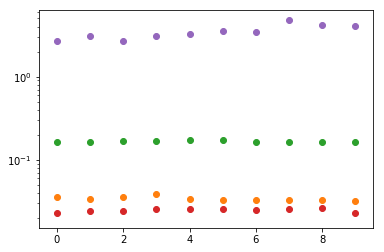

In [95]:
plt.scatter(range(len(knn_times)),knn_times)
plt.scatter(range(len(lr_times)),lr_times)
plt.scatter(range(len(svm_times)),svm_times)
plt.scatter(range(len(rf_times)),rf_times)
plt.scatter(range(len(mlp_times)),mlp_times)
plt.yscale('log')
plt.show()